In [301]:
import networkx as nx
import EoN
from collections import defaultdict
import matplotlib.pyplot as plt

In [302]:
n = 3  # Номер варианта
size = 100

a = 0.9  # Коэффициент возмонжости заражения
b = 0.01  # Коэффициет возможности восстановиться
y = 0.001  # Коэффициет возможности зараженного узела заболеть во время болезни заново
d = 0.001  # Коэффициет возможности вылеченного узела снова заболеть
to_isolation_rate = 0.000005 # Шанс на попадаениия в изоляцию
from_isolation_rate = 0.9 # Шанс на выхода из изоляции

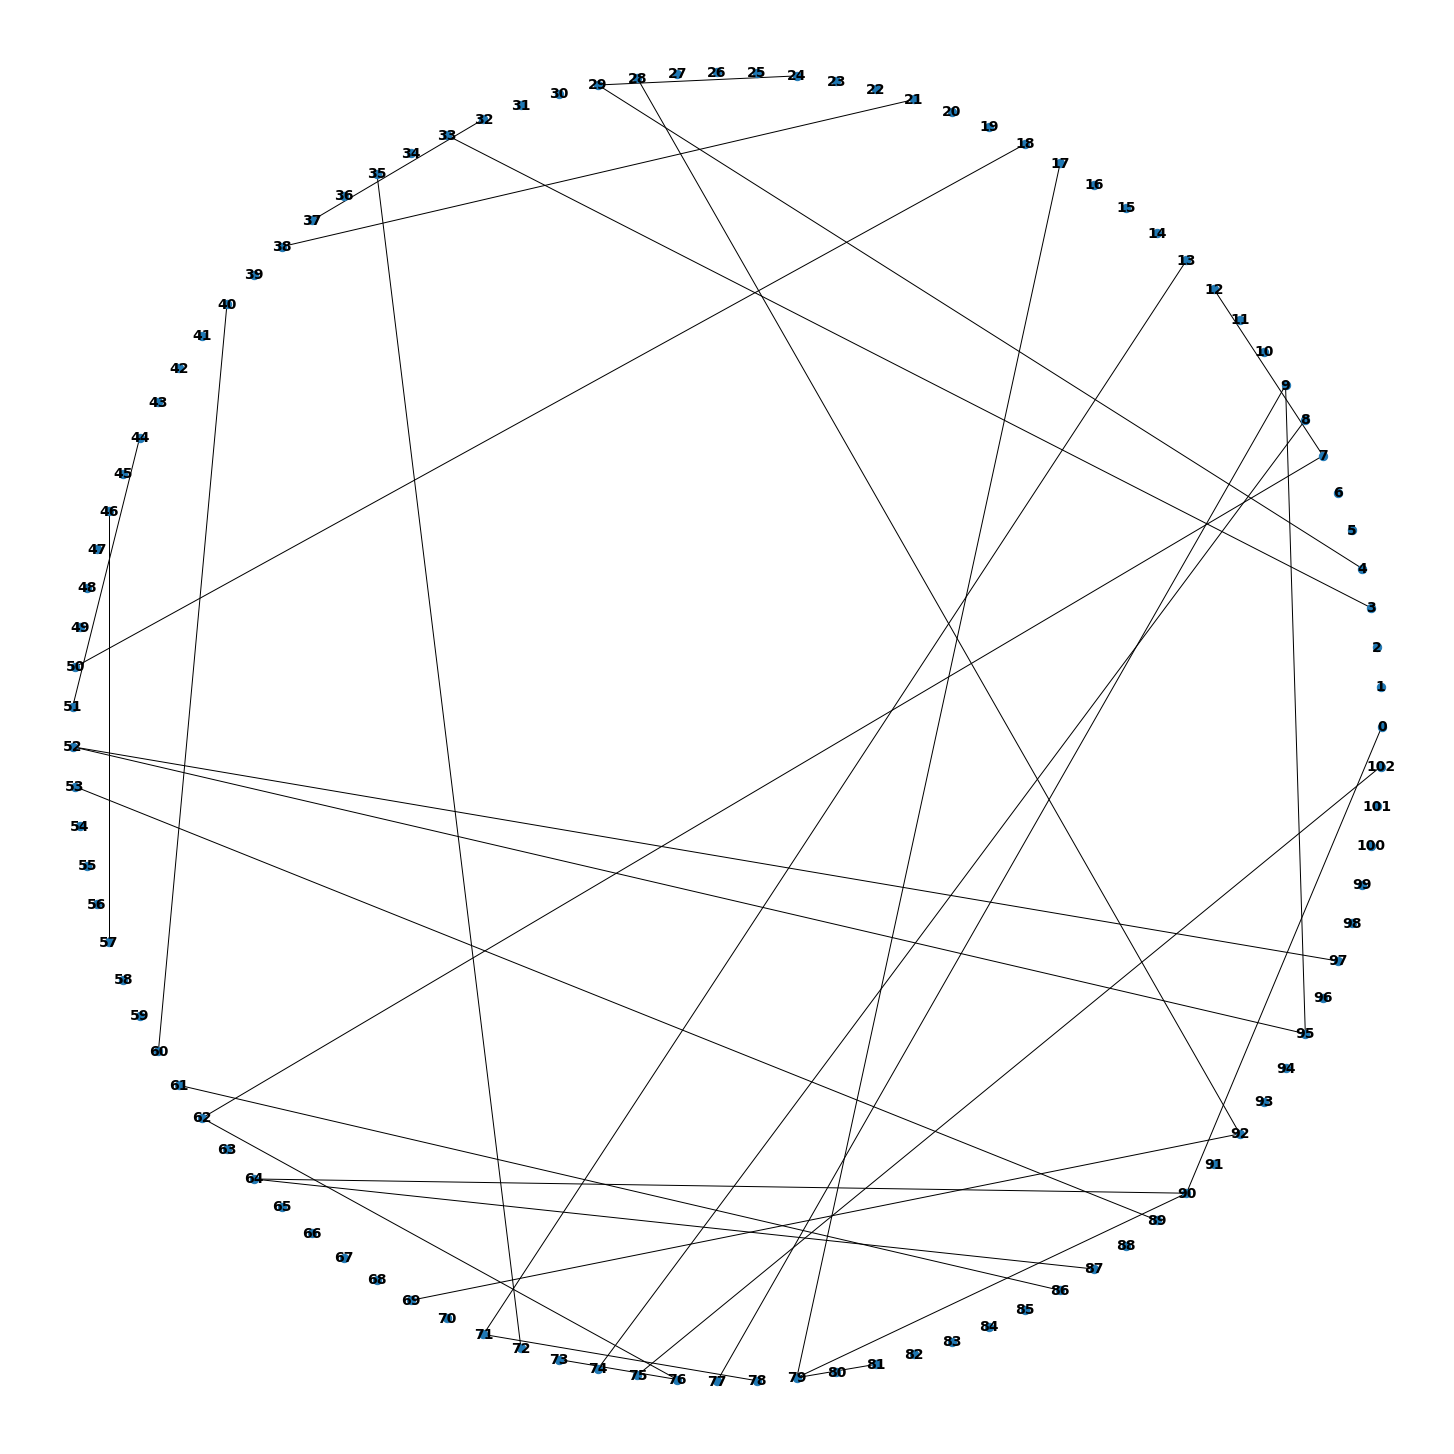

In [303]:
Gnp = nx.gnp_random_graph(size + n, .005)
pos = nx.circular_layout(Gnp)
plt.figure(figsize=(20, 20))
nx.draw(
    Gnp,
    pos,
    node_size=70,
    labels=dict(zip(list(Gnp.nodes()), list(Gnp.nodes()))),
    with_labels=True,
    font_size=14,
    font_weight="bold",
)
plt.show()
H = nx.DiGraph()

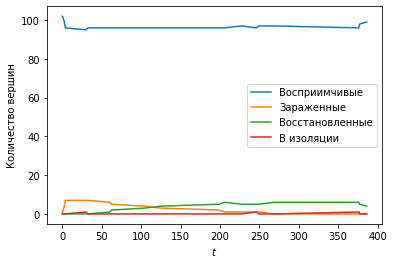

In [304]:
H.add_edge("I", "R", rate=b)
H.add_edge("I", "S", rate=y)
H.add_edge("R", "S", rate=d)
H.add_edge("S", "X", rate=to_isolation_rate)
H.add_edge("X", "S", rate=from_isolation_rate)

J = nx.DiGraph()
J.add_edge(("I", "S"), ("I", "I"), rate=a)  # возможность заразится
IC = defaultdict(lambda: "S")
IC[0] = "I"

t, S, I, R, X = EoN.Gillespie_simple_contagion(
    Gnp, H, J, IC, ("S", "I", "R", "X"), tmax=500
)

plt.plot(t, S, label="Восприимчивые")
plt.plot(t, I, label="Зараженные")
plt.plot(t, R, label="Восстановленные")
plt.plot(t, X, label="В изоляции")
plt.xlabel("$t$")
plt.ylabel("Количество вершин")
plt.legend()
plt.show()